##### The 5 stages for Data Analysis
* Ask Questions
* Wrangle Data : Gather, Assess and Clean
* Expore the data: Exploratory data analysis
* Draw conclusion : machine learning, inferential statistics, descriptive statistics.
* Communicate: Your analysis is only as valuable as your ability to communicate.

In [3]:
import pandas as pd

In [9]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_white = pd.read_csv('winequality-white.csv',sep=';')

In [10]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Ask Question 

##### Quiz 1:

1. What chemical characteristics are most important in predicting the quality of wine?

In [16]:
df_chem = df_red.drop(['density', 'pH'],axis=1)
df_corr=df_chem.corr()

In [19]:
df1 = df_corr.stack().reset_index().rename(columns={'level_0': "C1", "level_1": "C2", 0 : "Corr_val"})

df1['Corr_val']= df1['Corr_val'].abs()
df1 = df1[df1['Corr_val'] < 1].sort_values('Corr_val',ascending=False)
df1 = df1.drop_duplicates('Corr_val').reset_index(drop=True)
df1[(df1.C1 == 'quality') | (df1.C2 == 'quality') ]

,C1,C2,Corr_val
3,quality,alcohol,0.476166
4,volatile acidity,quality,0.390558
9,quality,sulphates,0.251397
10,quality,citric acid,0.226373
17,total sulfur dioxide,quality,0.185100
21,chlorides,quality,0.128907
22,fixed acidity,quality,0.124052
35,quality,free sulfur dioxide,0.050656
40,residual sugar,quality,0.013732


##### Quiz 2: Is a certain type of wine (red or white) associated with higher quality?

In [20]:
df_red.quality.mode()

0    5
dtype: int64

In [21]:
df_white.quality.mode()

0    6
dtype: int64

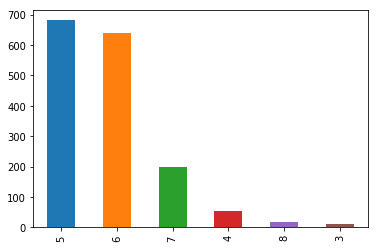

In [26]:
%matplotlib inline
ind = df_red.quality.value_counts().index
df_red.quality.value_counts()[ind].plot(kind='bar');

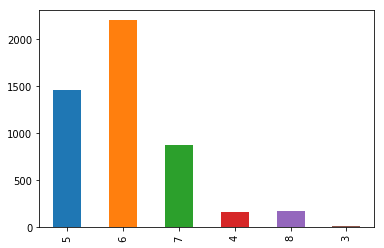

In [28]:
df_white.quality.value_counts()[ind].plot(kind='bar');

In [29]:
df_white.shape

(4898, 12)

In [30]:
df_red.shape

(1599, 12)

###### It appears as if white wine data set has higher quality samples and red wine data set has lower quality samples more

##### Quiz 3: Do wines with higher alcoholic content receive better ratings?

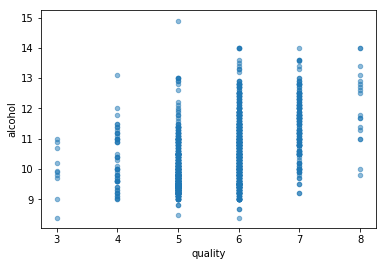

In [33]:
df_red.plot.scatter('quality', 'alcohol', alpha=0.5);

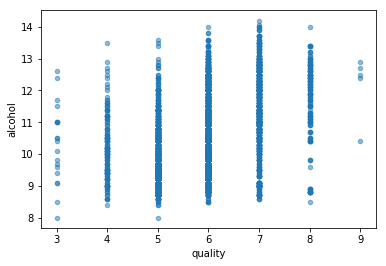

In [34]:
df_white.plot.scatter('quality', 'alcohol', alpha=0.5);

##### Higher the alcohol value higher is the quality in both red and white dataset

##### Quiz 4: Do sweeter wines (more residual sugar) receive better ratings?

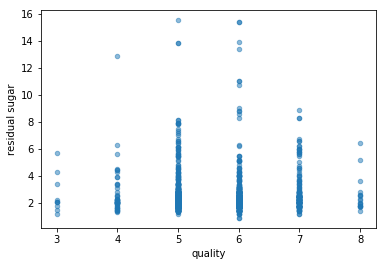

In [36]:
df_red.plot.scatter('quality', 'residual sugar', alpha=0.5);

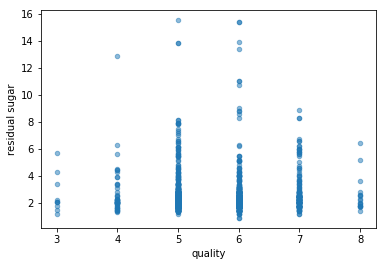

In [38]:
df_red.plot.scatter('quality', 'residual sugar', alpha=0.5);

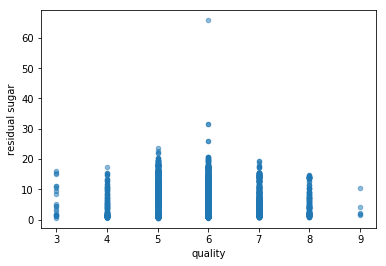

In [39]:
df_white.plot.scatter('quality', 'residual sugar', alpha=0.5);

##### lower the residual sugar is observed in both type of wines

##### Quiz 5: What level of acidity is associated with the highest quality?

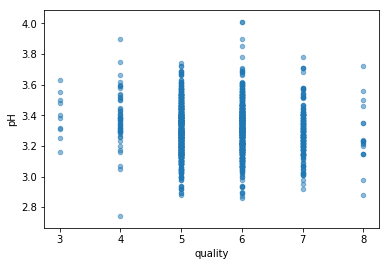

In [41]:
df_red.plot.scatter('quality', 'pH', alpha=0.5);

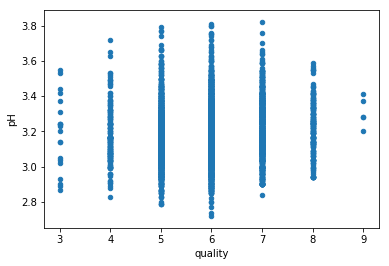

In [60]:
df_white.plot.scatter('quality', 'pH');

In [47]:
df_red.pH.mode(), df_white.pH.mode()

(0    3.3
 dtype: float64, 0    3.14
 dtype: float64)

In [58]:
for q in sorted(df_white.quality.unique()):
    print(q, df_white[df_white.quality == q].pH.mode()[0])

3 3.24
4 3.16
5 3.14
6 3.24
7 3.15
8 2.94
9 3.28


In [61]:
for q in sorted(df_red.quality.unique()):
    print(q, df_red[df_red.quality == q].pH.mode()[0])

3 3.16
4 3.38
5 3.36
6 3.32
7 3.26
8 3.15


##### Higher the acidity higher is the quality. a range of 3 to 3.5

### Assessing Data:

##### Are there any missing entries ?

In [64]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Are there any duplicate rows?

In [69]:
df_red[df_red.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
105,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5


In [71]:
df_white[df_white.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
39,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.600000,5
48,7.0,0.310,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.800000,6
61,6.0,0.190,0.26,12.40,0.048,50.0,147.0,0.99720,3.30,0.36,8.900000,6
63,6.6,0.380,0.15,4.60,0.044,25.0,78.0,0.99310,3.11,0.38,10.200000,6
74,6.7,0.230,0.31,2.10,0.046,30.0,96.0,0.99260,3.33,0.64,10.700000,8


In [72]:
df_white.shape

(4898, 12)

In [73]:
df_red.shape

(1599, 12)

##### There are high number duplicated rows !!!

##### number of unique values for quality in each dataset ...

In [77]:
df_red.quality.nunique(),sorted(df_red.quality.unique())

(6, [3, 4, 5, 6, 7, 8])

In [78]:
df_white.quality.nunique(), sorted(df_white.quality.unique())

(7, [3, 4, 5, 6, 7, 8, 9])

##### Mean density of red wine dataset

In [79]:
df_red.density.mean(), df_red.drop_duplicates().density.mean()

(0.9967466791744833, 0.9967089477557027)